# Description

It gets the PCA transformation of an input file.

# Modules loading

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from pathlib import Path
from IPython.display import display

import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

import conf
from utils import generate_result_set_name

# Settings

In [3]:
INPUT_FILEPATH = Path(
    conf.RESULTS['PROJECTIONS_DIR'],
    'projection-smultixcan-efo_partial-mashr-zscores.pkl'
).resolve()
display(INPUT_FILEPATH)

input_filepath_stem = INPUT_FILEPATH.stem
display(input_filepath_stem)

PosixPath('/media/miltondp/Elements1/projects/phenoplier/results/projections/projection-smultixcan-efo_partial-mashr-zscores.pkl')

'projection-smultixcan-efo_partial-mashr-zscores'

In [4]:
# number of components to use in the dimensionality reduction step
DR_OPTIONS = {
    'n_components': 50,
    'svd_solver': 'full',
    'random_state': 0,
}

In [5]:
# output dir for this notebook
RESULTS_DIR = Path(
    conf.RESULTS["DATA_TRANSFORMATIONS_DIR"],
    'pca'
).resolve()
RESULTS_DIR.mkdir(parents=True, exist_ok=True)

display(RESULTS_DIR)

PosixPath('/media/miltondp/Elements1/projects/phenoplier/results/data_transformations/pca')

In [6]:
# dictionary containing all options/settings (used to generate filenames)
ALL_OPTIONS = DR_OPTIONS.copy()
# ALL_OPTIONS['proj_percentile'] = PERCENTILE_NAME

display(ALL_OPTIONS)

{'n_components': 50, 'svd_solver': 'full', 'random_state': 0}

# Load input file

In [7]:
data = pd.read_pickle(INPUT_FILEPATH).T

In [8]:
data.shape

(3749, 987)

In [9]:
data.head()

,LV1,LV2,LV3,LV4,LV5,LV6,LV7,LV8,LV9,LV10,...,LV978,LV979,LV980,LV981,LV982,LV983,LV984,LV985,LV986,LV987
100001_raw-Food_weight,-0.018452,0.052938,-0.003629,0.028359,-0.015500,0.035854,-0.015439,0.023007,0.017368,0.026811,...,0.033560,0.047126,-0.036183,0.068750,0.023462,-0.030111,0.011272,-0.017171,0.016078,-0.022283
100002_raw-Energy,-0.043782,-0.012041,-0.011772,-0.006148,0.007011,0.018142,0.003144,0.018049,0.006926,0.038587,...,0.004833,0.022842,-0.009519,-0.000258,0.059764,-0.028394,-0.005967,0.045269,-0.007684,-0.018910
100003_raw-Protein,-0.021514,-0.028537,0.009441,0.007808,0.012707,0.021681,-0.006315,0.016129,0.000076,-0.001702,...,0.029704,0.029135,-0.056508,-0.002032,0.001189,-0.025507,-0.013012,0.037458,-0.009592,-0.016718
100004_raw-Fat,-0.030454,-0.052542,0.000459,-0.039613,0.006191,0.029523,0.000747,0.011876,-0.025758,0.025099,...,0.015900,0.016482,0.007409,-0.006833,0.036457,-0.034531,0.015365,0.023796,-0.017477,-0.005397
100005_raw-Carbohydrate,-0.017428,0.003757,-0.003708,-0.000929,-0.000647,-0.005729,0.024970,0.011531,0.035043,0.025159,...,-0.010071,0.002266,0.006664,0.007380,0.029940,-0.006989,0.014807,0.050208,0.005352,-0.049218


# PCA

In [11]:
dr_obj = PCA(**DR_OPTIONS)
display(dr_obj)

PCA(n_components=50, random_state=0, svd_solver='full')

In [12]:
dr_obj = dr_obj.fit(data)

In [13]:
dr_data = dr_obj.transform(data)

In [14]:
dr_data = pd.DataFrame(
    data=dr_data,
    index=data.index.copy(),
    columns=[f'PCA{i+1}' for i in range(dr_data.shape[1])]
)

In [15]:
dr_data.shape

(3749, 50)

In [16]:
dr_data.head()

,PCA1,PCA2,PCA3,PCA4,PCA5,PCA6,PCA7,PCA8,PCA9,PCA10,...,PCA41,PCA42,PCA43,PCA44,PCA45,PCA46,PCA47,PCA48,PCA49,PCA50
100001_raw-Food_weight,-0.026443,0.003588,-0.002027,-0.000064,0.040011,-0.001157,-0.005466,0.021813,-0.000475,0.048232,...,0.091270,0.003433,0.013544,-0.022929,-0.033115,-0.012867,-0.006426,-0.020415,-0.023928,0.017639
100002_raw-Energy,-0.056291,-0.023769,-0.037141,0.035929,-0.003324,0.013655,-0.041275,0.051805,0.056534,0.024914,...,0.027387,-0.033269,0.014515,-0.016254,-0.100001,-0.026993,-0.074925,-0.020538,-0.047693,0.023019
100003_raw-Protein,-0.019031,-0.028054,-0.040421,0.075812,-0.037268,0.025920,-0.041663,0.053016,0.057285,0.048128,...,0.042629,-0.052659,-0.020631,-0.005449,-0.122202,0.008350,-0.051640,0.034282,-0.051153,0.013526
100004_raw-Fat,-0.057567,-0.015702,-0.014410,0.045966,-0.021132,0.009801,0.001641,0.037666,0.033676,0.021842,...,0.006187,-0.008532,0.026803,-0.062449,-0.015771,-0.003877,0.000936,0.009474,-0.022016,0.017045
100005_raw-Carbohydrate,-0.063525,-0.007825,-0.009075,0.010261,0.001394,0.014753,-0.066035,0.044354,0.060402,0.009132,...,0.017321,-0.038514,0.027716,0.001119,-0.095943,-0.046005,-0.107355,-0.009970,-0.028637,0.008167


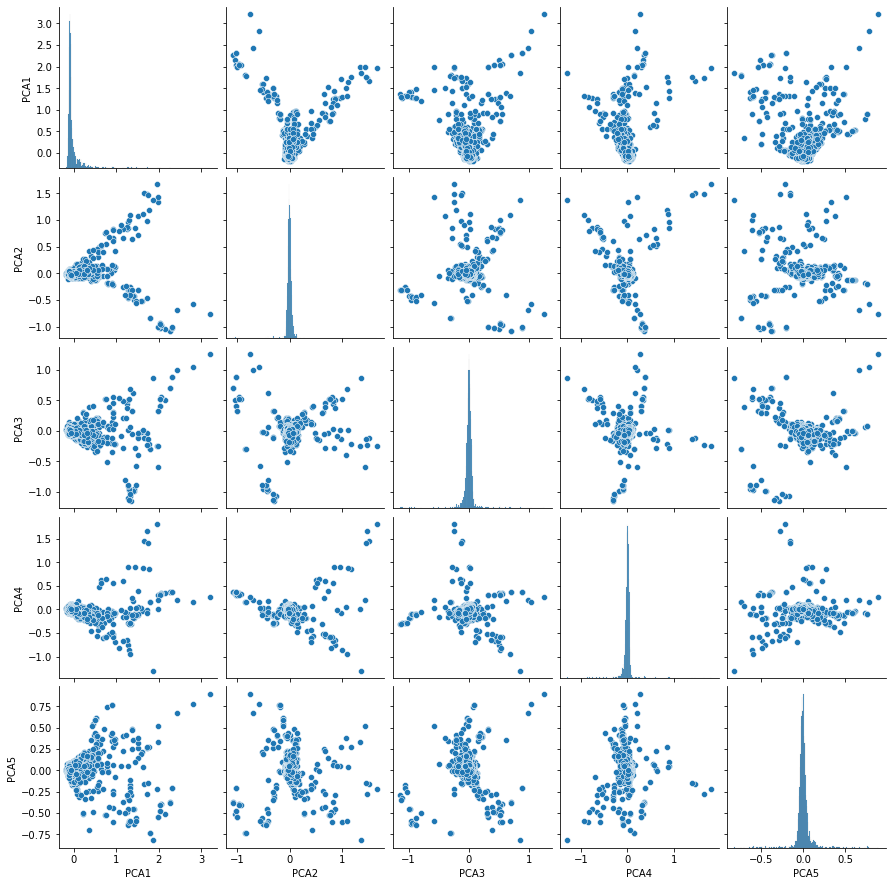

In [17]:
g = sns.pairplot(data=dr_data.iloc[:,:5])

# Save

In [18]:
output_file = Path(
    RESULTS_DIR,
    generate_result_set_name(
        ALL_OPTIONS,
        prefix=f'pca-{input_filepath_stem}-',
        suffix='.pkl'
    )
).resolve()

display(output_file)

PosixPath('/media/miltondp/Elements1/projects/phenoplier/results/data_transformations/pca/pca-projection-smultixcan-efo_partial-mashr-zscores-n_components_50-random_state_0-svd_solver_full.pkl')

In [19]:
dr_data.to_pickle(output_file)